In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import sunspots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Завантажуємо датасет Yearly Sunspots
data = sunspots.load_pandas().data
data.reset_index(drop=True, inplace=True)
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [3]:
# перевірка пропущених значень
print(data.isnull().sum())

YEAR           0
SUNACTIVITY    0
dtype: int64


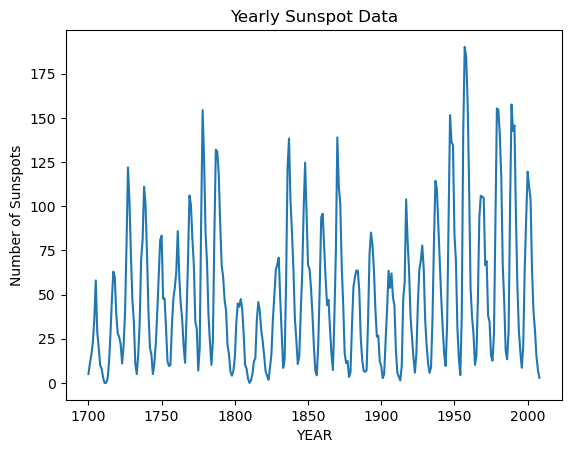

In [4]:
# вивід графіку датасету
plt.plot(data['YEAR'], data['SUNACTIVITY'])
plt.title('Yearly Sunspot Data')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.show()

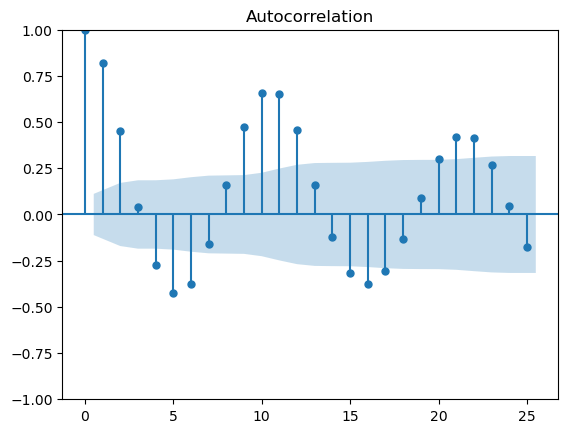

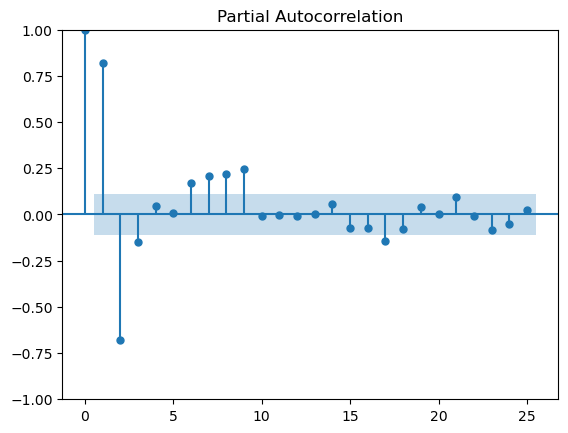

In [5]:
# перевірка стаціонарності
plot_acf(data['SUNACTIVITY'])
plot_pacf(data['SUNACTIVITY'], method='ywm')
plt.show()

In [6]:
# відокремлення сезонної складової
seasonal_diff = data['SUNACTIVITY'].diff(11).dropna()

In [7]:
# відокремлення трендової складової
trend_diff = seasonal_diff.diff().dropna()

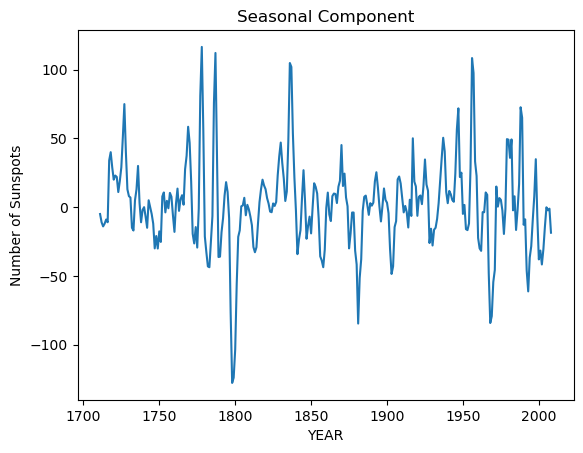

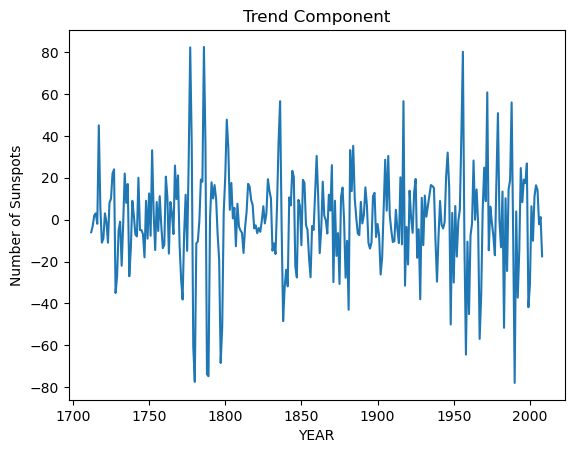

In [8]:
# вивід графіків відокремлених складових
plt.plot(data['YEAR'].iloc[11:], seasonal_diff)
plt.title('Seasonal Component')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.show()

plt.plot(data['YEAR'].iloc[12:], trend_diff)
plt.title('Trend Component')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.show()

In [14]:
# Відокремлюємо трендову та сезонну складові
seasonal_diff = data['SUNACTIVITY'].diff(11).dropna()
trend_diff = seasonal_diff.diff().dropna()

# Встановлення частоти для індексу
data = data.asfreq('D')  # Наприклад, встановлюємо щоденну частоту (D)

# Перетворення індексу на підтримуваний формат
data.index = pd.to_datetime(data.index)

# Побудова моделі ARIMA
model = ARIMA(trend_diff, order=(2, 1, 0))
model_fit = model.fit()

# Вивід статистики моделі
print(model_fit.summary())

# Прогнозування на майбутні значення
forecast_steps = 10  # Кількість кроків для прогнозу
forecast = model_fit.get_forecast(steps=forecast_steps)

# Створення індексу для прогнозних значень
last_index = data.index[-1]
forecast_index = pd.date_range(start=last_index + pd.DateOffset(1), periods=forecast_steps, freq=data.index.freq)

# Отримання прогнозованих значень та довірчих інтервалів
forecast_values = forecast.predicted_mean
forecast_values_series = pd.Series(forecast_values, index=forecast_index)
ci = forecast.conf_int()

# Вивід прогнозних значень та довірчих інтервалів
plt.plot(data['YEAR'], data['SUNACTIVITY'], label='Observed')
plt.plot(forecast_values_series.index, forecast_values_series, color='red', label='Forecast')
plt.fill_between(forecast_values_series.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)

plt.title('ARIMA Forecast')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:531: RuntimeWarning: invalid value encountered in double_scalars
  return

IndexError: index 0 is out of bounds for axis 0 with size 0

ValueError: x and y must have same first dimension, but have shapes (0,) and (22,)

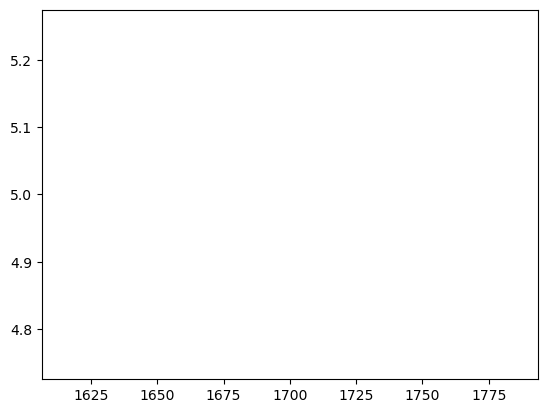

In [15]:
# побудова прогнозу на період 2009-2030 рр.
start_index = len(data)
end_index = len(data) + 21
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

# виведення прогнозу
plt.plot(data['YEAR'], data['SUNACTIVITY'], label='Observed')
plt.plot(data['YEAR'].iloc[287:], forecast, label='Forecast')
plt.title('Yearly Sunspot Data Forecast')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()